<a href="https://colab.research.google.com/github/ArunK-ML/ML-Model---SuperStore-Profit-Sales_Predict---DataSet-/blob/main/ML_Model_SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
try:
    df = pd.read_csv("/content/Sample - Superstore.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv("/content/Sample - Superstore.csv", encoding='cp1252')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**Handling No Null Value**

In [6]:
# Dtype change for date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
# Extract components
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Order_Weekday'] = df['Order Date'].dt.weekday  # 0 = Monday
df['Order_Week'] = df['Order Date'].dt.isocalendar().week

In [8]:
df['Ship_Year'] = df['Ship Date'].dt.year
df['Ship_Month'] = df['Ship Date'].dt.month
df['Ship_Day'] = df['Ship Date'].dt.day
df['Ship_Weekday'] = df['Ship Date'].dt.weekday      # 0 = Monday, 6 = Sunday
df['Ship_Week'] = df['Ship Date'].dt.isocalendar().week

In [9]:
df.drop('Order Date',axis=1,inplace=True)
df.drop('Ship Date',axis=1,inplace=True)

In [10]:
# Count Duplicate entry

df.duplicated().sum()

np.int64(0)

# **Encoder**

In [11]:
from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
  df[i] = code.fit_transform(df[i])

In [12]:
df

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Order_Year,Order_Month,Order_Day,Order_Weekday,Order_Week,Ship_Year,Ship_Month,Ship_Day,Ship_Weekday,Ship_Week
0,1,2500,2,143,166,0,0,194,15,42420,...,2016,11,8,1,45,2016,11,11,4,45
1,2,2500,2,143,166,0,0,194,15,42420,...,2016,11,8,1,45,2016,11,11,4,45
2,3,2296,2,237,201,1,0,266,3,90036,...,2016,6,12,6,23,2016,6,16,3,24
3,4,4372,3,705,687,0,0,153,8,33311,...,2015,10,11,6,41,2015,10,18,6,42
4,5,4372,3,705,687,0,0,153,8,33311,...,2015,10,11,6,41,2015,10,18,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,138,2,737,758,0,0,295,8,33180,...,2014,1,21,1,4,2014,1,23,3,4
9990,9991,3216,3,190,202,0,0,104,3,92627,...,2017,2,26,6,8,2017,3,3,4,9
9991,9992,3216,3,190,202,0,0,104,3,92627,...,2017,2,26,6,8,2017,3,3,4,9
9992,9993,3216,3,190,202,0,0,104,3,92627,...,2017,2,26,6,8,2017,3,3,4,9


# **Correlation testing**

In [13]:
df.corr()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Order_Year,Order_Month,Order_Day,Order_Weekday,Order_Week,Ship_Year,Ship_Month,Ship_Day,Ship_Weekday,Ship_Week
Row ID,1.000000,0.002433,0.016959,-0.000997,-0.003430,0.014058,NaN,-0.013973,0.015638,0.009671,...,0.015430,-0.018732,0.001832,-0.039364,-0.014163,0.015773,-0.021288,0.017157,-0.023127,-0.020364
Order ID,0.002433,1.000000,-0.028389,-0.012171,-0.014211,0.053304,NaN,-0.044207,0.012609,0.006846,...,0.702853,-0.033585,-0.006457,0.058678,-0.024254,0.698535,-0.023686,0.008522,-0.033024,-0.032221
Ship Mode,0.016959,-0.028389,1.000000,-0.025584,-0.024793,-0.004527,NaN,-0.003602,0.011865,-0.004068,...,-0.040575,-0.011926,0.022158,-0.039892,-0.007380,-0.035133,-0.022059,0.033944,0.020701,-0.020616
Customer ID,-0.000997,-0.012171,-0.025584,1.000000,0.995754,0.003361,NaN,0.003253,0.007215,0.010207,...,-0.038574,0.004364,0.014078,-0.025966,0.008106,-0.041831,0.016184,0.028711,0.001673,0.019856
Customer Name,-0.003430,-0.014211,-0.024793,0.995754,1.000000,-0.002696,NaN,0.001158,0.006779,0.009614,...,-0.040988,0.005996,0.012971,-0.024502,0.009427,-0.044191,0.017342,0.030255,-0.000528,0.020825
Segment,0.014058,0.053304,-0.004527,0.003361,-0.002696,1.000000,NaN,0.005505,-0.002567,-0.010772,...,0.040803,-0.024712,0.000204,0.008477,-0.032266,0.039291,-0.018712,0.002173,0.024543,-0.022921
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,-0.013973,-0.044207,-0.003602,0.003253,0.001158,0.005505,NaN,1.000000,0.009805,0.093806,...,-0.001503,0.002160,-0.019146,-0.002510,-0.002977,-0.004393,0.012894,-0.007179,0.007237,0.007137
State,0.015638,0.012609,0.011865,0.007215,0.006779,-0.002567,NaN,0.009805,1.000000,-0.285250,...,0.009109,-0.008224,-0.030380,-0.013103,-0.008055,0.008486,-0.007748,-0.004577,0.010674,-0.008073
Postal Code,0.009671,0.006846,-0.004068,0.010207,0.009614,-0.010772,NaN,0.093806,-0.285250,1.000000,...,0.004299,0.026234,0.016840,0.002269,0.031145,0.005024,0.022047,0.023215,0.000388,0.020969


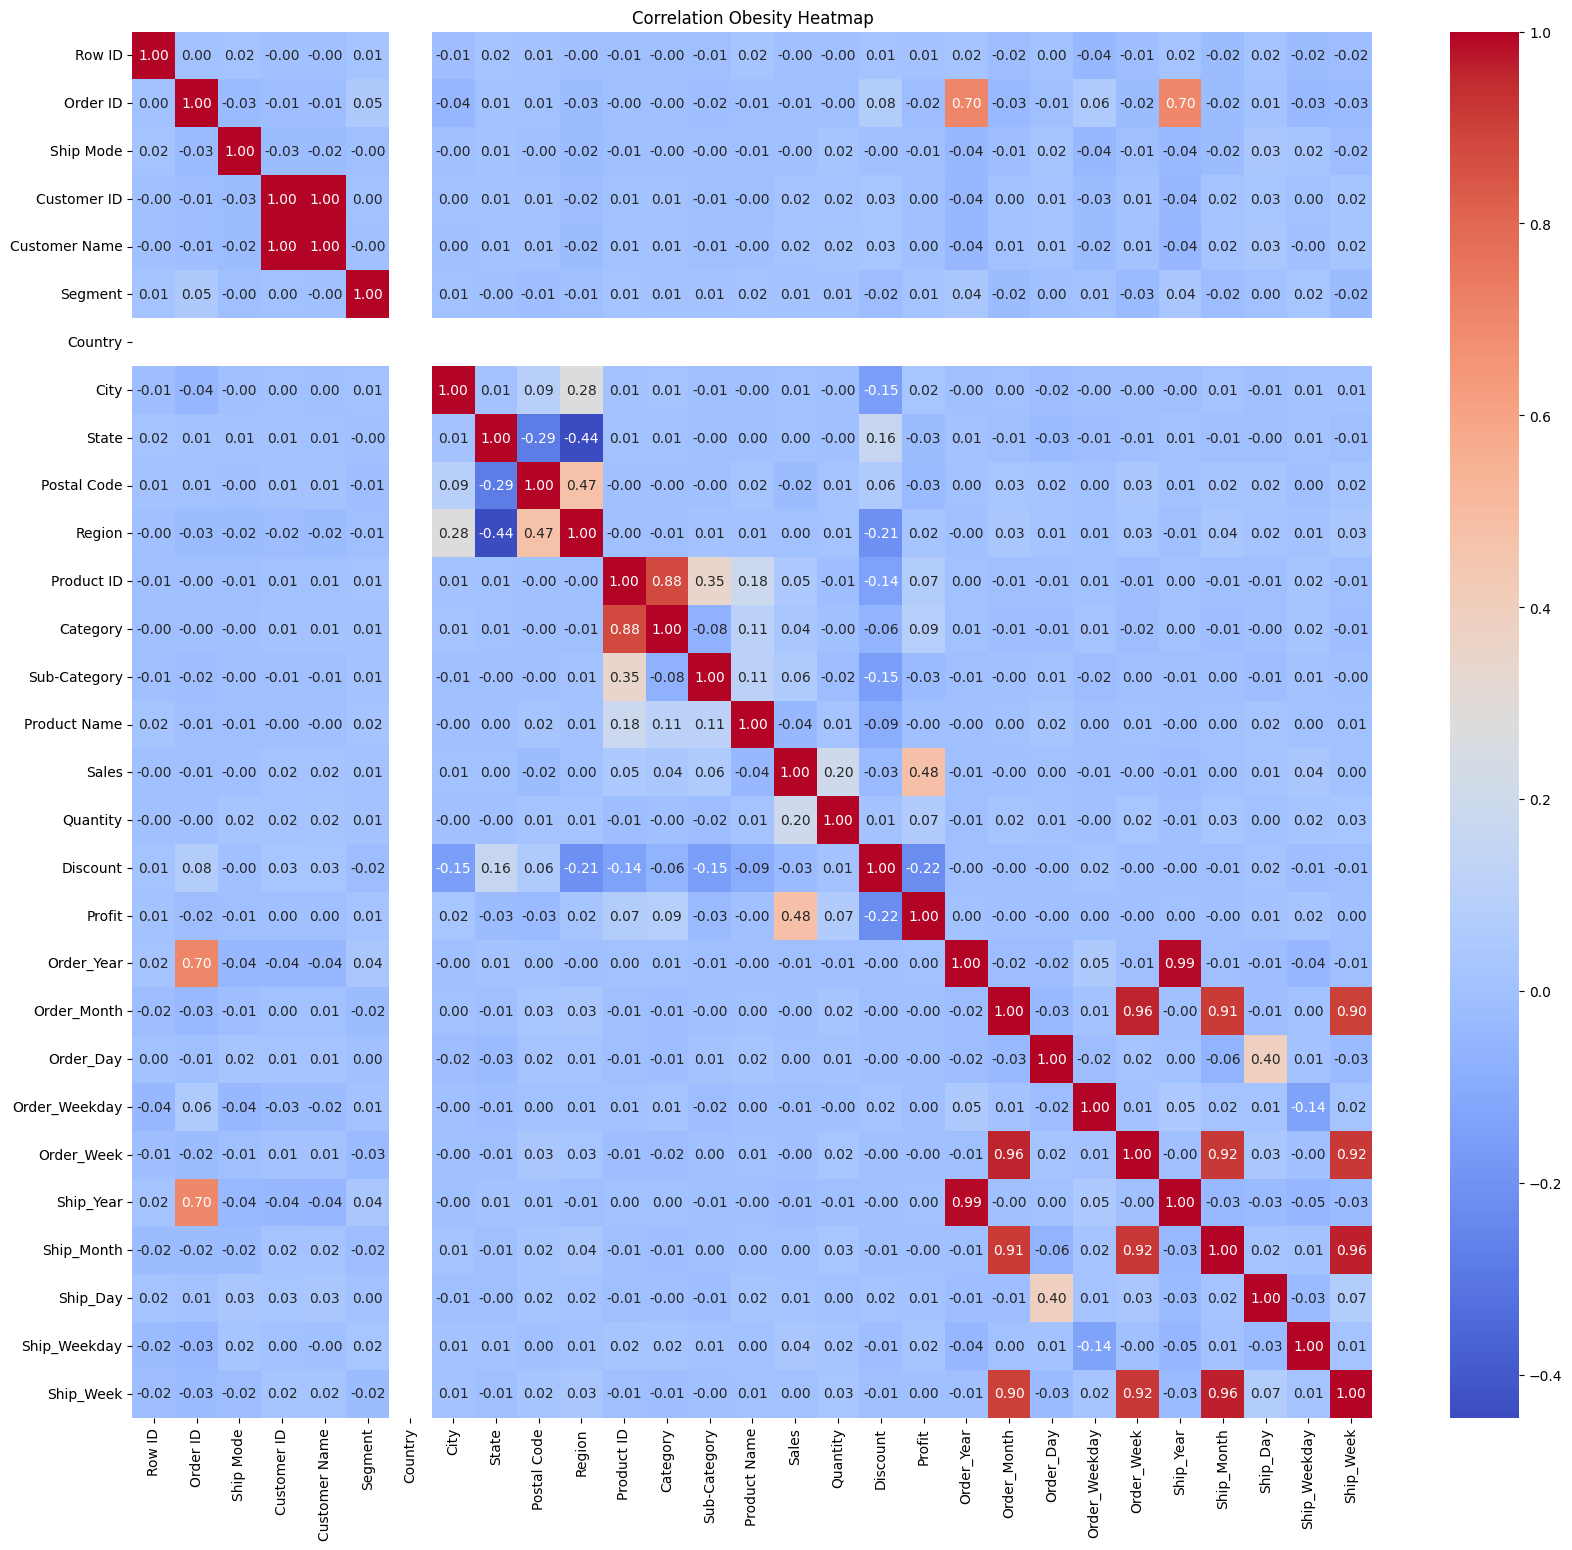

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr_obesity = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_obesity, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Obesity Heatmap")
plt.show()

In [18]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month',
       'Order_Day', 'Order_Weekday', 'Order_Week', 'Ship_Year', 'Ship_Month',
       'Ship_Day', 'Ship_Weekday', 'Ship_Week'],
      dtype='object')

In [19]:
df.drop(["Country"],axis=1,inplace=True)

In [22]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order_Year', 'Order_Month', 'Order_Day', 'Order_Weekday', 'Order_Week',
       'Ship_Year', 'Ship_Month', 'Ship_Day', 'Ship_Weekday', 'Ship_Week'],
      dtype='object')

# **Hypothesis testing**

In [21]:
df.drop(['Row ID', 'Order ID','Customer ID', 'Customer Name','Product ID','Product Name'],axis=1,inplace=True)

In [23]:
catergory = [ 'Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
              'Category', 'Sub-Category', 'Order_Month', 'Order_Day',
               'Order_Weekday', 'Order_Week', 'Ship_Month', 'Ship_Day',
               'Ship_Weekday', 'Ship_Week']

continous = ['Sales', 'Quantity','Discount', 'Profit',
             'Order_Year','Ship_Year']

In [24]:
from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

In [25]:
#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [26]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [27]:
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continous) and (j in continous):
            result=two_sample(df[i],df[j])
        elif (i in continous) and (j in catergory):
            result=annova_test(i,j)
        elif (i in catergory) and (j in continous):
            result=annova_test(j,i)
        elif (i in catergory) and (j in catergory):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [28]:
final_df = pd.DataFrame(final)
final_df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,...,Order_Year,Order_Month,Order_Day,Order_Weekday,Order_Week,Ship_Year,Ship_Month,Ship_Day,Ship_Weekday,Ship_Week
Ship Mode,1,1,1,1,1,1,0,0,1,0,...,0,1,1,1,1,0,1,1,1,1
Segment,1,1,1,1,1,0,0,0,1,1,...,0,1,1,1,1,0,1,1,1,1
City,1,1,1,1,1,1,0,0,1,1,...,0,1,1,1,1,0,1,1,1,1
State,1,1,1,1,1,1,0,0,0,1,...,0,1,1,1,1,0,1,1,1,1
Postal Code,1,1,1,1,1,1,0,0,1,1,...,0,1,1,1,1,0,1,1,1,1
Region,1,0,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Category,0,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
Sub-Category,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
Sales,1,1,1,0,1,1,0,0,1,0,...,0,1,1,1,0,0,1,1,0,1
Quantity,0,1,1,1,1,1,1,0,0,1,...,0,0,1,1,1,0,0,1,0,1


<Axes: >

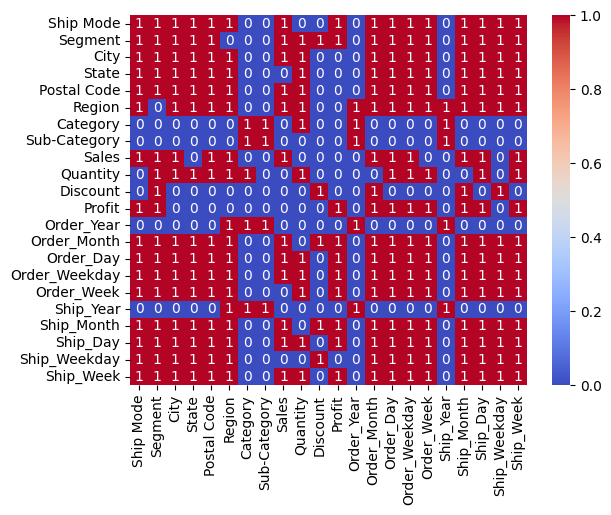

In [29]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

# **Skewness, Kurtosis**

In [30]:
from scipy.stats import boxcox

a = 0
for i in continous:
  if df[i].skew() < 0.5 and df[i].skew() > -0.5 and df[i].kurtosis() < 3 and df[i].kurtosis() > -3:
    continue
  print(i)
  a +=1
  method = [0,0.5,-0.5,-1,1,2,-2]
  for j in method:
    print(j)
    print("skewness",pd.DataFrame(boxcox(df[i],lmbda=j)).skew().values,"Kurtosis",pd.DataFrame(boxcox(df[i],lmbda=j)).kurtosis().values)
  print("---------------------------------")
print(a)

Sales
0
skewness [0.18864806] Kurtosis [-0.54138863]
0.5
skewness [2.78857804] Kurtosis [14.66519538]
-0.5
skewness [-1.7892395] Kurtosis [5.03641136]
-1
skewness [-5.90276817] Kurtosis [67.20387025]
1
skewness [12.97275234] Kurtosis [305.31175325]
2
skewness [51.42910962] Kurtosis [3278.21865156]
-2
skewness [-34.71081285] Kurtosis [1823.37680265]
---------------------------------
Quantity
0
skewness [-0.14786274] Kurtosis [-0.3705833]
0.5
skewness [0.5543549] Kurtosis [0.0319585]
-0.5
skewness [-0.85313094] Kurtosis [0.39032975]
-1
skewness [-1.50625612] Kurtosis [1.83814364]
1
skewness [1.27854475] Kurtosis [1.99188937]
2
skewness [3.07199107] Kurtosis [13.63915283]
-2
skewness [-2.38238619] Kurtosis [4.52710371]
---------------------------------
Discount
0
skewness [nan] Kurtosis [nan]
0.5
skewness [0.45577612] Kurtosis [-0.98919655]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [1.68429475] Kurtosis [2.40954612]
2
skewness [2.89167217] Kurtosis [7.

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [ ]:
#df['Price']=boxcox(df['Price'],lmbda=-0.5)
#df['Distance']=boxcox(df['Distance'],lmbda=0.5)
#df['Landsize']=boxcox(df['Landsize'],lmbda=0.5)

# **Train the model ML**

In [31]:
df.columns


Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order_Year', 'Order_Month', 'Order_Day', 'Order_Weekday', 'Order_Week',
       'Ship_Year', 'Ship_Month', 'Ship_Day', 'Ship_Weekday', 'Ship_Week'],
      dtype='object')

In [32]:
y = df['Profit']
x = df.drop("Profit",axis=1)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7495, 21), (2499, 21), (7495,), (2499,))

In [34]:
# Step 1
# Check for infinite values in x_train
print(x_train.columns[np.isinf(x_train).any()])

Index([], dtype='object')


In [35]:
# Step 2 for replacing inf values ,replaced the values by mean()
x_train.replace([np.inf,-np.inf],np.nan,inplace=True)
x_test.replace([np.inf,-np.inf],np.nan,inplace=True)
x_train.fillna(x_train.mean(),inplace=True)
x_test.fillna(x_test.mean(),inplace=True)

In [36]:
# Step 3
# Check for infinite values in x_train
print(x_train.columns[np.isinf(x_train).any()])

Index([], dtype='object')


In [37]:
# Step 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

27.922094890356146
1196541092666414.0
50707.67444196695
0.4311291409196112


In [ ]:
# Model 1
from sklearn.svm import SVR
model1 = SVR().fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

445102.2425512069
0.43928388444449346
455791518440.58484
-0.07591532551002245


In [ ]:
# Model 2
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor(n_neighbors=3)
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

382830.8592047128
0.4186447977244975
332450911875.2435
0.2152354385835652
